In [2]:
import numpy

import scipy.special

import matplotlib.pyplot

%matplotlib inline

In [3]:

class neuralNetwork:
    
    

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
   
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
     
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

    
        self.lr = learningrate
         
      
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    

    def train(self, inputs_list, targets_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
      
        hidden_inputs = numpy.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)
        

        final_inputs = numpy.dot(self.who, hidden_outputs)
   
        final_outputs = self.activation_function(final_inputs)
        
     
        output_errors = targets - final_outputs

        hidden_errors = numpy.dot(self.who.T, output_errors) 

        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    

    def query(self, inputs_list):
    
        inputs = numpy.array(inputs_list, ndmin=2).T

        
        hidden_inputs = numpy.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:

input_nodes = 784 # 28 x 28 -> Bild Segmentierung 
hidden_nodes = 200
output_nodes = 10


learning_rate = 0.5


n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [ ]:

epochs = 5

for e in range(epochs):
   
    for record in training_data_list:
     
        all_values = record.split(',')

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
      
        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [ ]:

test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
data_file = open("mnist_dataset/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:



scorecard = []


for record in test_data_list:

    all_values = record.split(',')

    correct_label = int(all_values[0])

    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
  
    if (label == correct_label):
 
        scorecard.append(1)
    else:

        scorecard.append(0)
        pass
    
    pass

In [ ]:

scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

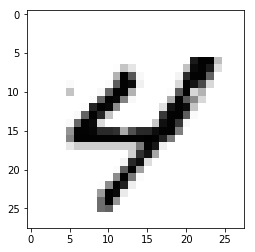

In [14]:
all_values = data_list[89].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')


In [16]:
print(data_list[89])

4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,232,253,253,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,86,46,0,0,0,0,0,0,91,246,252,232,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,252,187,13,0,0,0,0,22,219,252,252,175,0,0,0,0,0,0,0,0,0,10,0,0,0,0,8,181,252,246,30,0,0,0,0,65,252,237,197,64,0,0,0,0,0,0,0,0,0,87,0,0,0,13,172,252,252,104,0,0,0,0,5,184,252,67,103,0,0,0,0,0,0,0,0,0,0,0,0,0,8,172,252,248,145,14,0,0,0,0,109,252,183,137,64,0,0,0,0,0,0,0,0,0,0,0,0,5,224,252,248,134,0,0,0,0,0,53,238,252,245,86,0,0,0,0,0,0,0,0,0,0,0,0,12,174,252,223,88,0,0,0,0,0,0,209,252,252,179,9,0,0,0,0,0,0,0,0,0,0,0,11,171,252,246,61,0,0,0,0,0,0,83,241,252,211,14,0,0,0,0,0,0,0,0,0,0,0,0,129,252,252,249,

In [ ]:
print(scorecard)